In [1]:
#Library
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Import data set
df = pd.read_csv('car.csv')

# Data Cleaning

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [5]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

<Axes: >

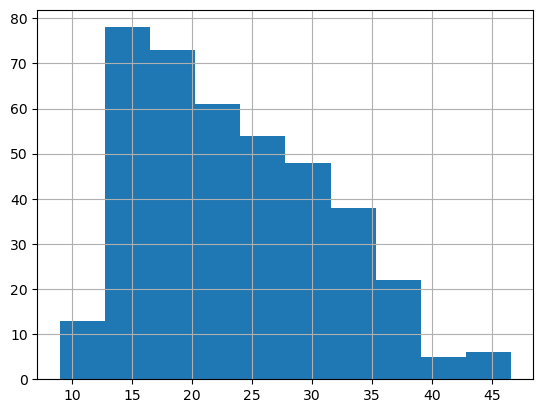

In [6]:
df['MPG'].hist()

<Axes: >

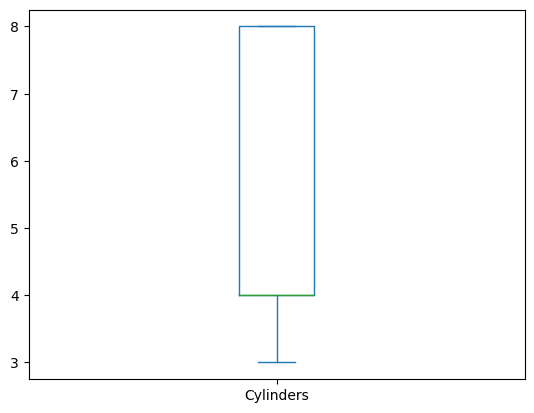

In [7]:
df['Cylinders'].plot.box()

<Axes: >

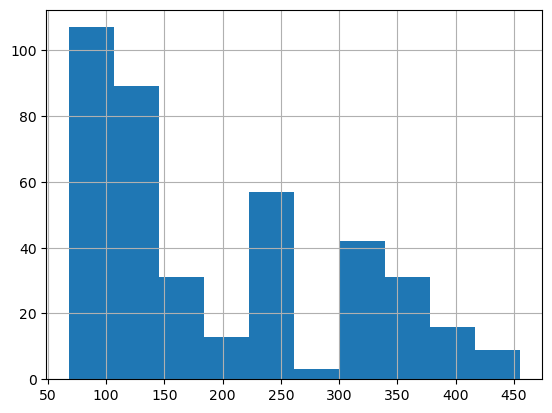

In [8]:
df['Displacement'].hist()

<Axes: >

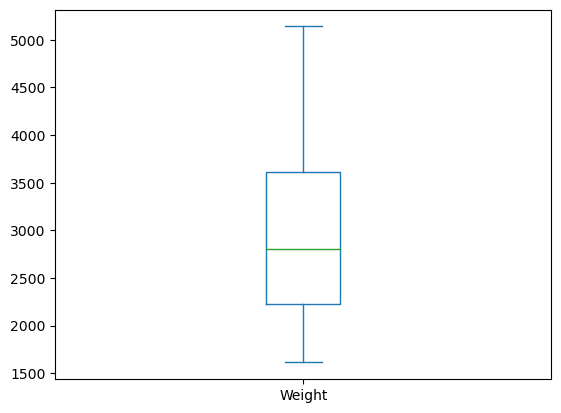

In [9]:
df['Weight'].plot.box()

In [10]:
df['Model Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [11]:
df['US Made'].unique()

array([1, 0], dtype=int64)

<Axes: >

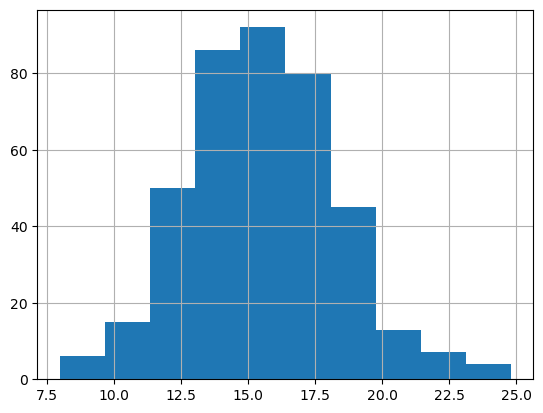

In [12]:
df['Acceleration'].hist()

In [13]:
df['Horsepower'].value_counts

<bound method IndexOpsMixin.value_counts of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: Horsepower, Length: 398, dtype: object>

In [14]:
df['Horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
#Converting Horsepower to Numeric data
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

<Axes: >

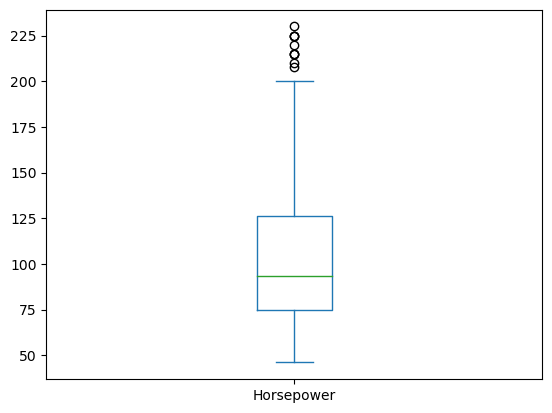

In [16]:
df['Horsepower'].plot.box()

<Axes: >

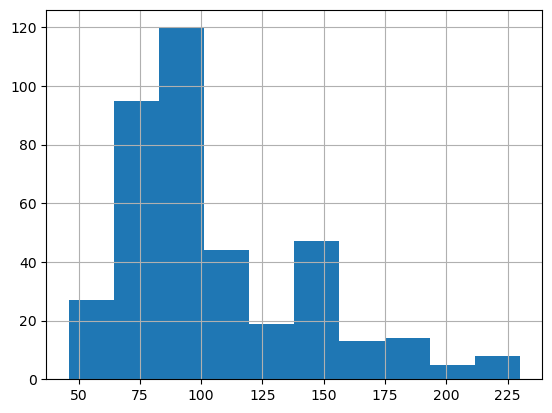

In [17]:
df['Horsepower'].hist()

In [18]:
# Assuming df is your DataFrame
median_values = df['Horsepower'].median()  # Calculate the median for each column

# Fill null values with the median
df.fillna(median_values, inplace=True)

In [19]:
df.duplicated().sum()

0

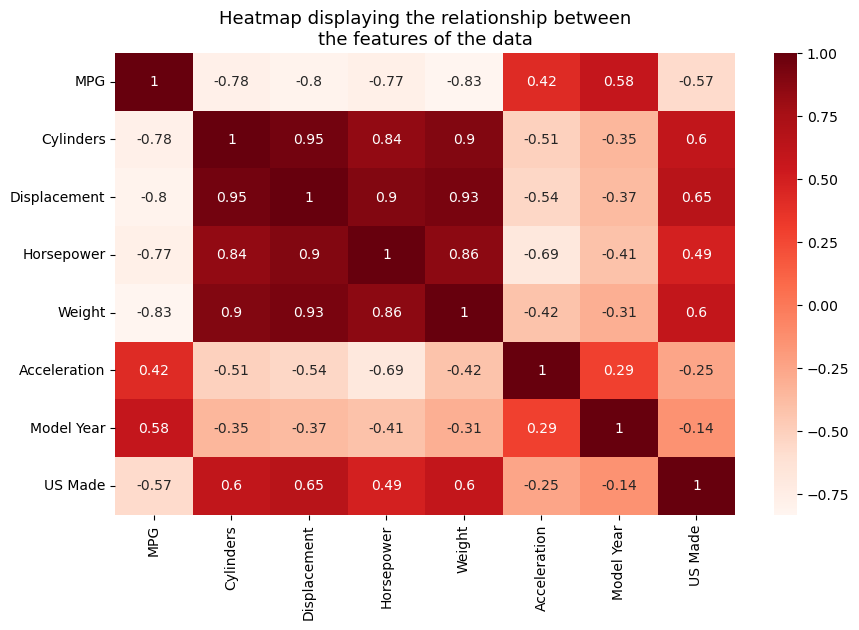

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

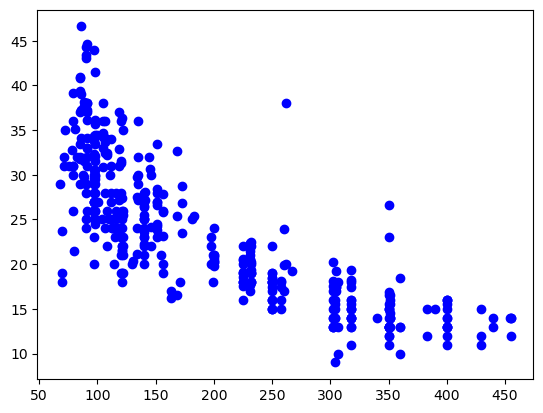

In [21]:
plt.scatter(df['Displacement'],df['MPG'], c ="blue")
 
# To show the plot
plt.show()

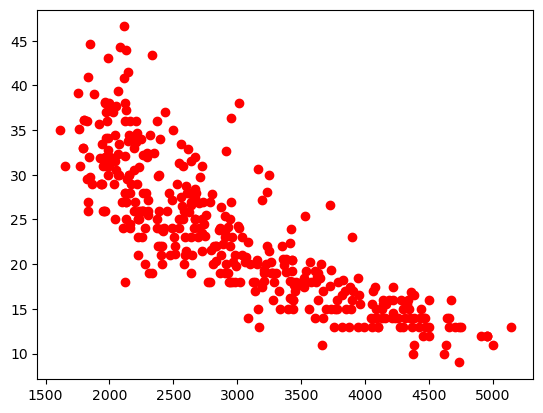

In [22]:
plt.scatter(df['Weight'],df['MPG'], c ="red")
 
# To show the plot
plt.show()

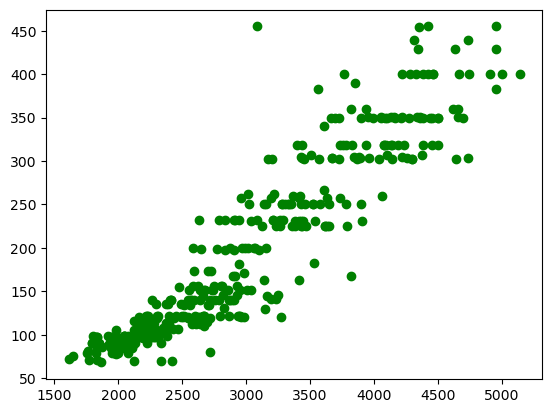

In [23]:
plt.scatter(df['Weight'],df['Displacement'], c ="green")
 
# To show the plot
plt.show()

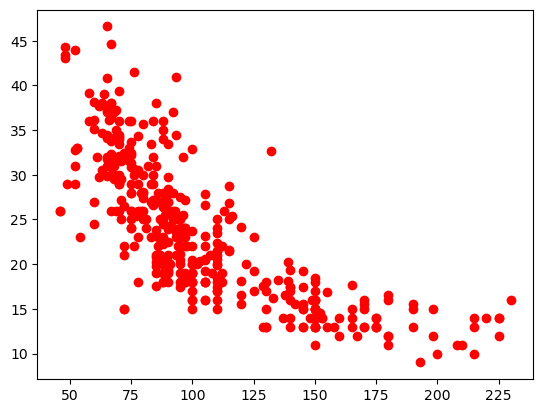

In [24]:
plt.scatter(df['Horsepower'],df['MPG'], c ="red")
 
# To show the plot
plt.show()

In [25]:
# Select the variables for which you want to calculate VIF
variables_to_check = ['Weight', 'Displacement', 'Horsepower', 'Cylinders']

# Create a DataFrame containing only the selected variables
X = df[variables_to_check]

# Add a constant term to the DataFrame (intercept for VIF calculation)
X = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

       Variable        VIF
0         const  51.042520
1        Weight   7.998385
2  Displacement  19.402609
3    Horsepower   5.250354
4     Cylinders  10.559470


In [26]:
new_df = df.drop(['Horsepower','Displacement','Weight'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(new_df)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

series2

const           612.136106
MPG               3.766247
Cylinders         3.181471
Acceleration      1.375553
Model Year        1.678913
US Made           1.744215
dtype: float64

# Linear model building 

In [27]:
y= new_df['MPG']
x = new_df.drop(columns=['MPG'])
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)


In [28]:
x_train_with_constant = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train_with_constant)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     211.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.43e-87
Time:                        14:58:32   Log-Likelihood:                -899.93
No. Observations:                 318   AIC:                             1810.
Df Residuals:                     313   BIC:                             1829.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.8227      5.632     -4.585   

# Part 3

In [36]:
# Define the response variable
y = new_df['MPG']

# Create a list of available predictor variables
predictor_variables = new_df.drop(columns=['MPG'])

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, y, test_size=0.2, random_state=42)

# Initialize all features as selected features
selected_features = predictor_variables.columns.tolist()  # Convert column names to a list

# Create an initial model with all features
X = sm.add_constant(X_train[selected_features])  # Add a constant term for the intercept
model = sm.OLS(y_train, X).fit()
best_aic = model.aic

# Perform backward stepwise selection using AIC
while len(selected_features) > 1:
    feature_to_remove = None
    for feature in selected_features:
        candidate_features = selected_features.copy()
        candidate_features.remove(feature)
        X = sm.add_constant(X_train[candidate_features])  # Update the predictor variables
        candidate_model = sm.OLS(y_train, X).fit()
        aic = candidate_model.aic
        if aic < best_aic:
            best_aic = aic
            feature_to_remove = feature
    if feature_to_remove is not None:
        selected_features.remove(feature_to_remove)
    else:
        break

# Print the selected features and their coefficients
print("Selected Features (Backward Selection):", selected_features)

Selected Features (Backward Selection): ['Cylinders', 'Model Year', 'US Made']


In [37]:
# Define the response variable
y = df['MPG']

# Extract the selected features
selected_features = ['Cylinders', 'Model Year', 'US Made']
X = df[selected_features]

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Build and fit the regression model using the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     282.7
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           7.19e-89
Time:                        15:05:37   Log-Likelihood:                -897.05
No. Observations:                 318   AIC:                             1802.
Df Residuals:                     314   BIC:                             1817.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6661      5.359     -3.670      0.0

In [39]:
# Define the response variable
y = df['MPG']

# Extract the selected features
selected_features = ['Cylinders', 'Model Year']
X = df[selected_features]

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Build and fit the regression model using the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     412.7
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           9.90e-89
Time:                        15:08:45   Log-Likelihood:                -881.41
No. Observations:                 318   AIC:                             1769.
Df Residuals:                     315   BIC:                             1780.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4302      5.119     -2.233      0.0